In [46]:
from vega3 import Vega
from phylopandas.tree import read_newick

In [132]:
df = read_newick('tree2.newick')
values = df.to_dict(orient='records')

In [134]:
data = {
    "data": [
        {
            "name": "tree",
            "values": values,
            "transform": [
                {
                    "type": "stratify",
                    "key": "id",
                    "parentKey": "parent"
                },
                {
                    "type": "tree",
                    "method": "cluster",
                    "size": [{"signal": "height"}, {"signal": "width - 100"}],
                    "as": ["y", "x", "depth", "children"]
                },
                {
                    "type": "formula",
                    "expr": "datum.distance * 200",
                    "as": "x"
                },
                {
                    "type": "formula",
                    "expr": "datum.y",
                    "as": "y"
                }         
            ]
        },
        {
            "name": "links",
            "source": "tree",
            "transform": [
                { 
                    "type": "treelinks", 
                    "key": "id" 
                },
                {
                    "type": "linkpath",
                    "orient": "horizontal",
                    "shape": "orthogonal"
                }
            ]
        },
        {
            "name": "nodes",
            "source": "tree",
            "transform": [{ "type": "filter", "expr": "datum.type == 'node'" }]
        },
        {
            "name": "leaves",
            "source": "tree",
            "transform": [{ "type": "filter", "expr": "datum.type == 'leaf'" }]
        }
    ]
}

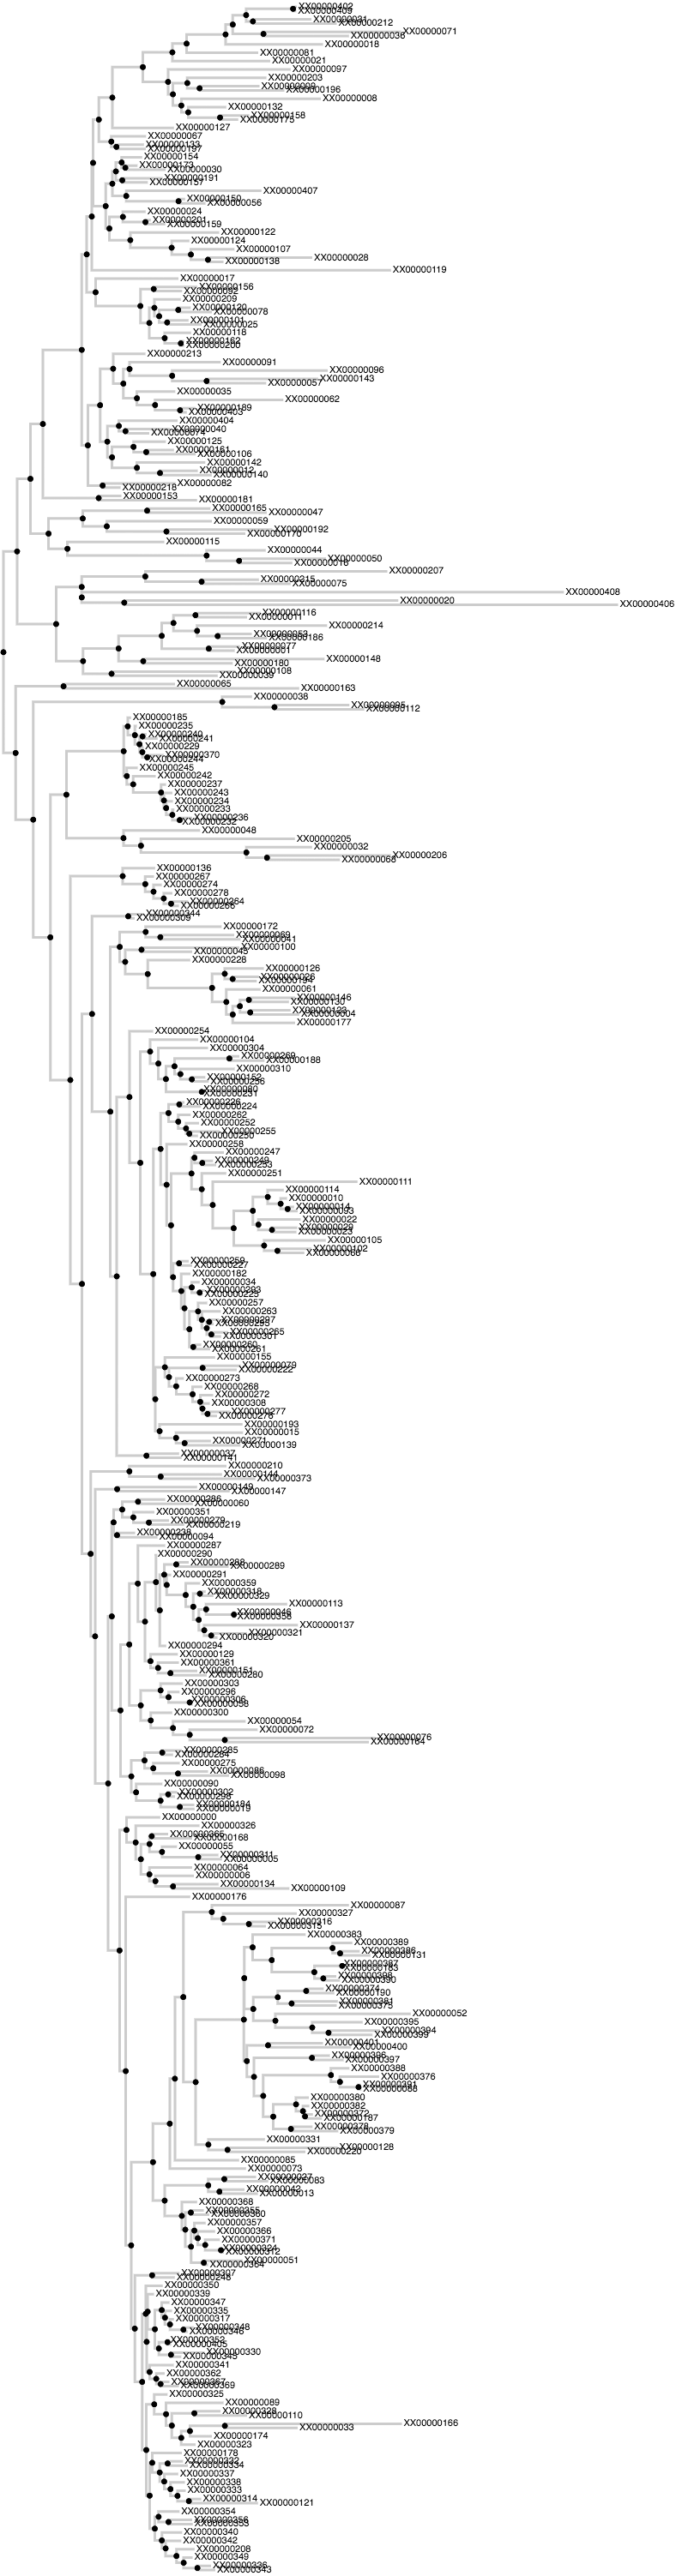

In [138]:
SPEC_DEFAULT = {
    "$schema": "https://vega.github.io/schema/vega/v3.0.json",
    "width": 500,
    "height":3000,
    "padding": 0,

    # -------------- SCALES -------------

    "scales": [
        {
        "name": "color",
        "type": "sequential",
        "range": {"scheme": "magma"},
        "domain": {"data": "tree", "field": "depth"},
        "zero": True
        }
    ],

    "marks": [
        {
            "type": "path",
            "from": {"data": "links"},
            "encode": {
                "update":{
                    "path": {"field": "path"},
                    "stroke": {"value": "#ccc"}, 
                    "strokeWidth": {"value": 3},
                },
            },
        },
        {
            "type": "symbol",
            "from": {"data": "nodes"},
            "encode": {
                "enter": {
                    "size": {"value": 30},
                    "stroke": {"value": "#000"},
                    "x": {"field": "x"},
                    "y": {"field": "y"},
                    "fill": {"value": "#000"},
                }
            }
        },
        {
            "type": "text",
            "from": {"data": "leaves"},
            "encode": {
                "enter": {
                    "fill": {"value": "#000"},
                    "text": {"field": "label"},
                },
                "update": {
                    "x": {"field": "x"},
                    "y": {"field": "y"},                    
                    "dx": {"value": 2},
                    "dy": {"value": 3},
                }
            }
        },
    ]
}

SPEC_DEFAULT.update(**data)

x = Vega(SPEC_DEFAULT)
x.display()